## Appendix


## Imputation Analysis

<AxesSubplot: >

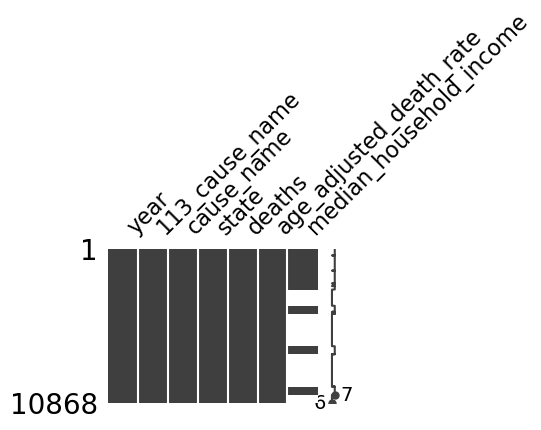

In [ ]:
mno.matrix(df_joined, figsize = (3, 2))

After joining, the median_household_income is an additional column for the death data set.

We only have the median household income for the year 1990, 2000, 2005, 2010 and 2013-2017.
In the death dataset we find the years starting from 1999 until 2017.
That is the reason why we only have 4576 non-null values for the median household income. 
This means that roughly 58 % of the column has empty values which we need to either fill (by imputing) or remove.

Since removing would lead to our dataset to be cut by over half, that is not a viable option.

First lets take a look at the some statistics for the median household income and its distribution.

## Summary Statistics

In [ ]:
# Dataframe with only median household income as column
df_household_income = df_joined[['median_household_income']]

# Summary statistics
df_household_income.describe().round(2).T

count      mean      std      min      25%      50%  \
median_household_income  4576.0  58179.33  9580.27  40000.0  51050.0  56350.0   

                             75%      max  
median_household_income  64000.0  82400.0

In [ ]:
# Interquartile range
q1 = df_household_income.quantile(q = 0.25)
q3 = df_household_income.quantile(q = 0.75)
iqr = q3-q1
iqr

median_household_income    12950.0
dtype: float64

Distribution

<AxesSubplot: title={'center': 'Distribution of median household income before imputation'}, ylabel='Density'>

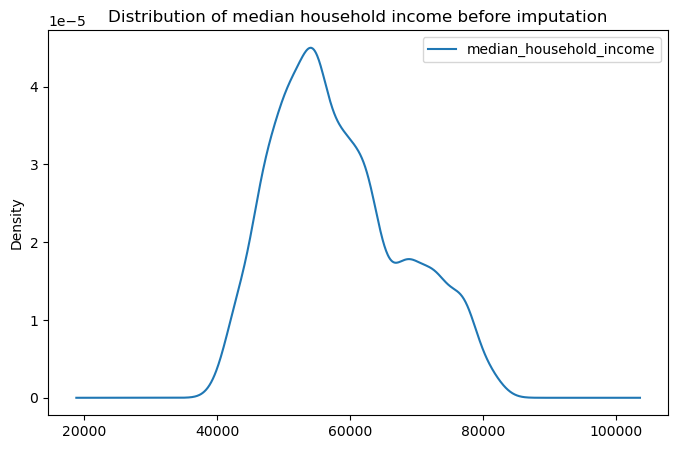

In [ ]:
# Distribution of median household income
df_household_income.plot(kind='kde', figsize=(8, 5), title='Distribution of median household income before imputation')

Plot

In [ ]:
# Scatterplot income over years before imputation
scatter_income_before = alt.Chart(df_joined).mark_circle(size=60).encode(
    x=alt.X('year', 
            title='Year',
            scale=alt.Scale(domain = (1999,2018))
            ),
    y=alt.Y('median_household_income', 
            title='Median Household Income ($)',
            scale=alt.Scale(zero=False)
            ),
    tooltip=['year', 'median_household_income']
).interactive()

scatter_income_before

alt.Chart(...)

In [ ]:
# Boxplot over all income values before imputation
box_income_before = alt.Chart(df_household_income).mark_boxplot(size = 50).encode(
    x=alt.X('median_household_income', scale = alt.Scale(zero = False)),
    y=alt.Y()
).properties(
    width = 450,
    height = 80)

box_income_before

alt.Chart(...)

The distribution is unimodal and right skewed extending from 40k \$ to over 80k $.

The median is found at 56350 $ and with an IQR at 12950  there are no outliers present in the income data.

Also the values for the years 1999, 2001-2004, 2006-2009, 2011 & 2012 are missing.

## Imputed dataset

Let us take a look what the imputation has done for the missing values and how we can use the result:

Summary statistics

In [ ]:
# Compare the original and imputed median income column
df_income = df_joined[['median_household_income']].copy()
df_income['income_KNN_Scaled'] = imputed_scaled['median_household_income']

# Obtain summary statistics
df_income.describe().T[['mean', 'std', 'min', '50%', 'max']]

mean          std      min      50%      max
median_household_income  58179.326923  9580.271444  40000.0  56350.0  82400.0
income_KNN_Scaled        57765.145381  9375.632377  40000.0  55800.0  82400.0

In [ ]:
# Interquartile range
q1 = df_income.quantile(q = 0.25)
q3 = df_income.quantile(q = 0.75)
iqr = q3-q1
iqr

median_household_income    12950.0
income_KNN_Scaled          13000.0
dtype: float64

Distribution

<AxesSubplot: title={'center': 'Distribution of median household income after imputation'}, ylabel='Density'>

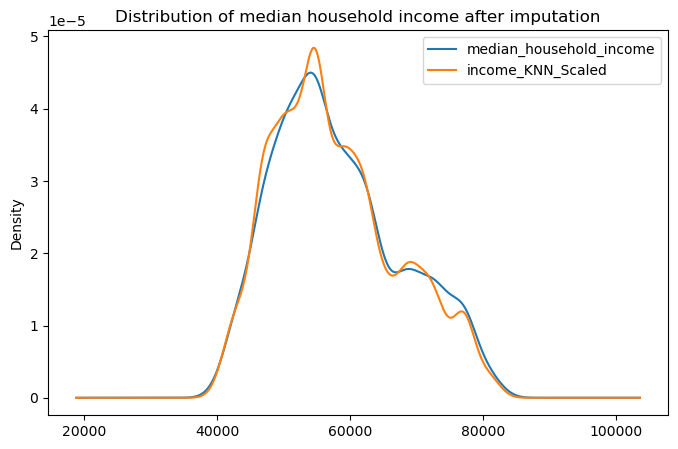

In [ ]:
# Distribution of median household income
df_income.plot(kind='kde', figsize=(8, 5), title='Distribution of median household income after imputation')

Plot

In [ ]:
# Scatterplot income over years after imputation
scatter_income_after = alt.Chart(imputed_scaled).mark_circle(size=60).encode(
    x=alt.X('year', 
            title='Year',
            scale=alt.Scale(domain = (1999,2018))
            ),
    y=alt.Y('median_household_income', 
            title='Median Household Income ($)',
            scale=alt.Scale(zero=False)
            ),
    tooltip=['year', 'median_household_income']
).interactive()

# Vertical concatenation of scatterplots before and after imputation
alt.vconcat(scatter_income_before, scatter_income_after)


alt.VConcatChart(...)

In [ ]:
# Boxplot over all income values after imputation
box_income_after = alt.Chart(imputed_scaled).mark_boxplot(size = 50).encode(
    x=alt.X('median_household_income', scale = alt.Scale(zero = False)),
    y=alt.Y()
).properties(
    width = 450,
    height = 80)

# Vertical concatenation of boxplots before and after imputation
alt.vconcat(box_income_before, box_income_after)

alt.VConcatChart(...)

From the summary statistics we can see that the imputed values represent the original values quite good, the values are close to the existing ones. The IQR is slightly greater but there are still no outliers after the imputation. This can be explained with the method we used, since the KNN algorithm imputes the values by calculating distances to existing neighbour data points for every instance we want to replace. 

We found that by setting the number of neighbours (n_neighbours) to 1, the imputed data represents the original data the best without making assumptions. Since we are no domain experts, we want to change the data as little as possible.

The scatterplot shows that the missing values for median household income have been copied from years with existing values. For example the years 1999 - 2002 all share the values from 2000, 2003 - 2007 the values from 2005 and 2008 - 2011 the values from 2010. 2012 has been cipied from 2013.
This has the advantage, that it maintains the spread in the data. The disadvantage is, that we make the implicit assumption that the median household income by state stayed the same for the years close to 2000, 2005 and 2010.

This is visible by comparing the boxplots before and after imputation which are very similar. 

In reality the median income almost certainly did not stay the same, but for our case this gives a decent estimation for training our model.

This will leave us with 6 columns in total, which we can use for our data analysis (we will later disregard the 113 Cause name column since we will see, that the same information is provided by the cause name column):

## Additinal data exploration

In [ ]:
alt.Chart(df_explore).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['median_household_income', 'deaths', 'age_adjusted_death_rate'],
    column=['median_household_income', 'deaths', 'age_adjusted_death_rate']
).interactive()

In [ ]:
alt.Chart(df_explore).mark_circle().encode(
    alt.X('year', scale=alt.Scale(zero=False)),
    alt.Y('age_adjusted_death_rate', scale=alt.Scale(zero=False, padding=1)),
    color='state', 
)

Zusammenfassen, pro Staat, pro Jahr, die Gesamttodesrate visualsieren

In [ ]:
alt.Chart(df_explore).mark_circle().encode(
    alt.X('year', scale=alt.Scale(zero=False)),
    alt.Y('median_household_income', scale=alt.Scale(zero=False, padding=1)),
    color='state', 
)

Für Später: Ausblick: Wie entwickelt sie der household income in den einzelnen Staaten, gibt es starke Schwankungen? Wie war dort die Todesrate?

In [ ]:

alt.Chart(df_explore).mark_bar(opacity=0.7).encode(
    x='cause_name:O',
    y=alt.Y('age_adjusted_death_rate:Q', stack=None),
    color="state",
    tooltip=['state']
    ).transform_filter(
    {'not':alt.FieldEqualPredicate(field='cause_name', equal='All causes')}

)

This graph is showing us, that heart disease in Arizona and cancer in South Dakota, are with distance the top death causes regarding death rate. We remember, that cancer has a really strong negative correlation with the median income.

--> wie verteilt sich der Lohn in South Dakota?

In [ ]:
alt.Chart(
    df_explore,
).mark_bar().encode(
    x=alt.X('cause_name:N', sort='-y'),
    y=alt.Y('age_adjusted_death_rate:Q'),
    color=alt.Color('cause_name:Q')

).transform_window(
    rank='rank(cause_name)',
    sort=[alt.SortField('cause_name', order='descending')]
).transform_filter(
    (alt.datum.rank < 5)
)

https://altair-viz.github.io/gallery/top_k_items.html
Daten anpassen!

## Model

This assumption could change, depending on the insights we get from our analysis of the data. Therefore we will also take the following models into account:
* Polynomial Regression, in case the relationship between predictor and response variable is not linear
* Bayesian Regression
* Decision Tree Regression, mainly xgboost
* Gradient Descent Regression

In order to find the best performing model, we will compare them using a specific metric (e.g. Mean Squared Error or Mean Absolute Error)

## Darstellungsideen:

* Darstellung aus Einleitung übernehmen:
    - Verhältnis Einkommen zu Deathrate visualisieren
        - x-Achse: Income
        - y-Achse: Deathrate
        - Kategorien: state
        - Plot art: Linie

* Verlauf von Deathrate pro State über die Jahre
    - x-Achse: Year
    - y-Achse: Deathrate
    - Kategorien: state
    - Plot art: Scatter
* Verlauf von Einkommen pro State über die Jahre
    - x-Achse: Year
    - y-Achse: Income
    - Kategorien: state
    - Plot art: Scatter
* Verteilung Einkommen pro Region in unterschiedlichen Jahren
    - Neue Variable: region (aus Geografischer Verteilung der States bauen)
    - x-Achse: Year
    - y-Achse: Deathrate
    - Kategorien: region
    - Plot art: Ridge, faceted
* Anzahl Gesamttode pro Todesart darstellen
    - x-Achse: Todesart
    - y-Achse: Tode
    - (Kategorien: state vielleicht zu Granular?)
    - Plot art: Bar Plot
* Einkommensdurchschnitt über alle Jahre für alle Staaten
    - x-Achse: region (neu berechnen, siehe oben)
    - y-Achse: Mean income (neu berechnen)
    - Plot art: Bar Plot
* Wie oft kommen welche Einkommensbereiche vor
    - x-Achse: Einkommensbereich (neu berechnen)
    - y-Achse: Count
    - Plot art: Histogramm
    - Einfärbung, in welchem Staat der Bereich am ehesten vorkommt?
* Wie oft kommen Bereiche von Todesraten vor
    - x-Achse: Bereich Todesrate (neu berechnen)
    - y-Achse: Count
    - Plot art: Histogramm
    - Einfärbung, in welchem Staat der Bereich am ehesten vorkommt?

* Top 5 und Bottom 5
    - States mit höchstem median income und states mit niedrigstem
        - x-Achse: Year
        - y-Achse: Deathrate
        - Kategorien: 5 states mit höchstem / niedrigstem (filtern notwendig)
        - Plot art: Linie


